In [19]:
import networkx as nx
import networkx.algorithms.community as nx_comm
import argparse
import numpy as np
import pandas as pd
from tqdm import tqdm
import torch
import torch.nn.functional as F
from torch import optim

def node_connects_cluster(node):
    return set(map(lambda x: inverse_cluster_dict[x], list(g[node]))).union(set([inverse_cluster_dict[node]]))

path = 'Dataset/socfb-Stanford3.mtx'

df = pd.read_table(path, skiprows=1, names = ["source", "target"], sep=" ")
g = nx.from_pandas_edgelist(df)

# calculate basic elements
num_nodes = g.number_of_nodes()
num_edges = g.number_of_edges()
degs = [g.degree[i] for i in g.nodes]
avg_deg = sum(degs)/len(degs)


clu_res = 5
clusters = nx_comm.louvain_communities(g, seed = 10, resolution = clu_res)
clusters = sorted(clusters, key = len, reverse=True)
cluster_sizes = list(map(len, clusters))
num_cluster = len(clusters)

# dict: from node to its cluster
inverse_cluster_dict = {
    node: cl for cl in range(num_cluster) for node in clusters[cl]
}

# dict: from node to its connected cluster
node_to_connected_clusters = {
    node: node_connects_cluster(node) for node in range(1, num_nodes + 1)
}

In [20]:
l = np.load("optimized_cov/L_matrix_cov_res{}_omega{}_{}.npy".format(clu_res, 1, "stf"))
treated_prop_list = []
for i in range(10000):
    Z = (np.sign(np.matmul(l, np.random.randn(num_cluster))) + 1)/2  # mu + Lx, reparameterization
    treated_prop_list.append(len(np.where(Z==1)[0])/num_cluster)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 94 is different from 95)

Text(0.5, 0, 'Treated Proportion')

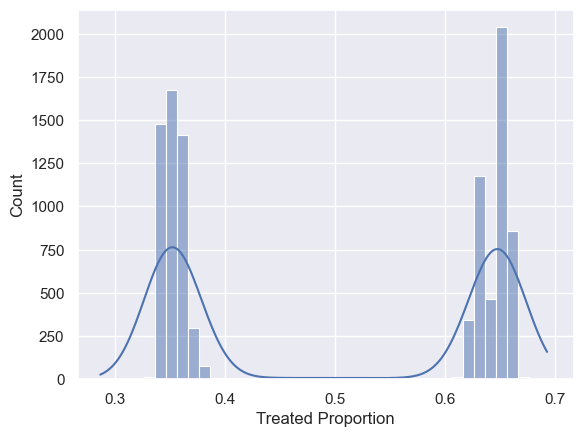

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns;sns.set()
sns.histplot(treated_prop_list, kde=True, binwidth=0.01)
plt.xlabel("Treated Proportion")

In [13]:
sns.histplot?

Signature:
sns.histplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    weights=None,
    stat='count',
    bins='auto',
    binwidth=None,
    binrange=None,
    discrete=None,
    cumulative=False,
    common_bins=True,
    common_norm=True,
    multiple='layer',
    element='bars',
    fill=True,
    shrink=1,
    kde=False,
    kde_kws=None,
    line_kws=None,
    thresh=0,
    pthresh=None,
    pmax=None,
    cbar=False,
    cbar_ax=None,
    cbar_kws=None,
    palette=None,
    hue_order=None,
    hue_norm=None,
    color=None,
    log_scale=None,
    legend=True,
    ax=None,
    **kwargs,
)
Docstring:
Plot univariate or bivariate histograms to show distributions of datasets.

A histogram is a classic visualization tool that represents the distribution
of one or more variables by counting the number of observations that fall within
discrete bins.

This function can normalize the statistic computed within each bin to estimate
frequency, density or probability mas